In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [39]:
df = pd.read_csv('Data-Melbourne_F_fixed.csv')
df

,Unnamed: 0,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,1377,5.068,4.716,305938.0,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56.0,0.00,10.0,14.4,22.2,2019.0,6.0,20.0
1378,1378,5.882,5.510,293446.0,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71.0,0.00,0.0,13.5,25.9,2019.0,6.0,24.0
1379,1379,4.638,4.811,307968.0,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65.0,0.00,10.0,18.1,25.9,2019.0,6.0,25.0
1380,1380,5.373,4.929,316675.0,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65.0,0.00,10.0,21.9,35.2,2019.0,6.0,26.0


In [40]:
df.rename(columns={'Unnamed: 0':'Serial No.'}, inplace=True )

In [41]:
df.set_index('Serial No.', inplace = True)
df.head()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
Serial No.,,,,,,,,,,,,,,,,,,,
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0


In [42]:
df.shape

(1382, 19)

Checking for null values

In [43]:
df.isna().sum()   

Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
Year                        0
Month                       0
Day                         0
dtype: int64

Checking for duplicate values

In [44]:
df.duplicated().value_counts()

False    1382
Name: count, dtype: int64

Creating a new column for BOD to COD ratio and removing Ammonia column as Total Nitrogen accounts for all the different forms of nitrogen in waste water

In [45]:
df['BOD/COD'] = df['Biological Oxygen Demand'] / df['Chemical Oxygen Demand']
df.drop(['Ammonia'], axis=1, inplace=True)
col = df.pop('BOD/COD')
df.insert(5, col.name, col)
df.head()

,Average Outflow,Average Inflow,Energy Consumption,Biological Oxygen Demand,Chemical Oxygen Demand,BOD/COD,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
Serial No.,,,,,,,,,,,,,,,,,,,
0,2.941,2.589,175856.0,365.0,730.0,0.500000,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,2.936,2.961,181624.0,370.0,740.0,0.500000,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2.928,3.225,202016.0,418.0,836.0,0.500000,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,2.928,3.354,207547.0,430.0,850.0,0.505882,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,2.917,3.794,202824.0,508.0,1016.0,0.500000,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0


In [46]:
df.describe()

,Average Outflow,Average Inflow,Energy Consumption,Biological Oxygen Demand,Chemical Oxygen Demand,BOD/COD,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,382.061708,845.960434,0.455988,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259,2016.258321,6.184515,15.584660
std,1.228778,1.439583,44640.533689,85.996012,145.416540,0.088025,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362,1.583491,3.410588,8.741422
min,0.000004,2.589000,116638.000000,140.000000,360.000000,0.160000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1.000000,1.000000
25%,3.074500,3.643250,246435.750000,330.000000,751.250000,0.391304,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000,2015.000000,3.000000,8.000000
50%,3.701000,4.161500,275808.000000,360.000000,845.000000,0.472066,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000,2016.000000,6.000000,15.000000
75%,4.498750,4.847750,305703.750000,422.980000,920.000000,0.500000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000,2018.000000,9.000000,23.000000
max,7.920000,18.968000,398328.000000,850.000000,1700.000000,0.953846,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000,2019.000000,12.000000,31.000000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1382 entries, 0 to 1381
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average Outflow           1382 non-null   float64
 1   Average Inflow            1382 non-null   float64
 2   Energy Consumption        1382 non-null   float64
 3   Biological Oxygen Demand  1382 non-null   float64
 4   Chemical Oxygen Demand    1382 non-null   float64
 5   BOD/COD                   1382 non-null   float64
 6   Total Nitrogen            1382 non-null   float64
 7   Average Temperature       1382 non-null   float64
 8   Maximum temperature       1382 non-null   float64
 9   Minimum temperature       1382 non-null   float64
 10  Atmospheric pressure      1382 non-null   float64
 11  Average humidity          1382 non-null   float64
 12  Total rainfall            1382 non-null   float64
 13  Average visibility        1382 non-null   float64
 14  Average wind 

In [48]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.drop(['Year', 'Month', 'Day'], axis=1, inplace=True)
df.head()

,Average Outflow,Average Inflow,Energy Consumption,Biological Oxygen Demand,Chemical Oxygen Demand,BOD/COD,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Date
Serial No.,,,,,,,,,,,,,,,,,
0,2.941,2.589,175856.0,365.0,730.0,0.500000,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014-01-01
1,2.936,2.961,181624.0,370.0,740.0,0.500000,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014-01-02
2,2.928,3.225,202016.0,418.0,836.0,0.500000,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014-01-05
3,2.928,3.354,207547.0,430.0,850.0,0.505882,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014-01-06
4,2.917,3.794,202824.0,508.0,1016.0,0.500000,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014-01-07


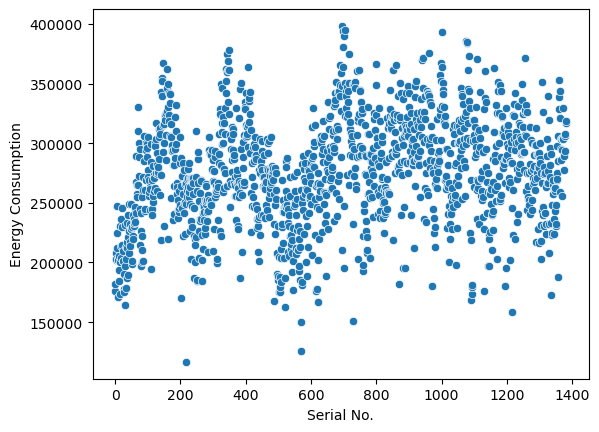

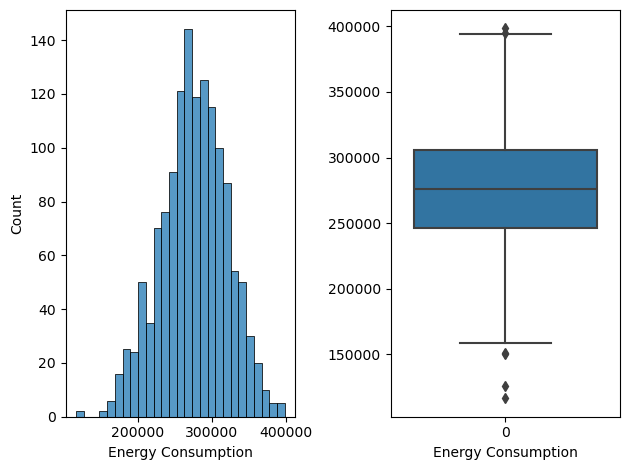

In [49]:
sns.scatterplot(df['Energy Consumption'])
plt.show()
plt.subplot(1,2,1)
sns.histplot(df['Energy Consumption'])
plt.subplot(1,2,2)
plt.xlabel('Energy Consumption')
sns.boxplot(df['Energy Consumption'])
plt.tight_layout()
plt.show()

In [50]:
df.corr()

,Average Outflow,Average Inflow,Energy Consumption,Biological Oxygen Demand,Chemical Oxygen Demand,BOD/COD,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Date
Average Outflow,1.000000,0.541923,0.167099,-0.115811,-0.022723,-0.101314,-0.061951,-0.000163,0.006070,0.035516,-0.068941,-0.016560,-0.090001,-0.027635,-0.015406,-0.006319,0.308192
Average Inflow,0.541923,1.000000,0.136211,-0.121364,0.018026,-0.143359,-0.035827,0.098149,0.093073,0.140905,-0.012452,-0.040534,-0.100358,-0.031872,-0.025010,-0.012203,0.378619
Energy Consumption,0.167099,0.136211,1.000000,-0.136945,0.000346,-0.146832,-0.167448,-0.266053,-0.245119,-0.222896,-0.004160,0.155245,-0.014242,0.007085,0.020656,0.017388,0.230556
Biological Oxygen Demand,-0.115811,-0.121364,-0.136945,1.000000,0.524189,0.647354,0.455843,0.150706,0.137368,0.133025,-0.011270,-0.087240,0.001186,-0.019039,0.001384,0.000370,-0.242249
Chemical Oxygen Demand,-0.022723,0.018026,0.000346,0.524189,1.000000,-0.288182,0.681225,0.083946,0.090018,0.052716,0.002585,-0.152655,-0.055335,-0.050351,-0.029496,-0.006580,0.227455
BOD/COD,-0.101314,-0.143359,-0.146832,0.647354,-0.288182,1.000000,-0.091389,0.092734,0.073651,0.098783,-0.013407,0.036775,0.047443,0.027227,0.019850,0.002303,-0.467283
Total Nitrogen,-0.061951,-0.035827,-0.167448,0.455843,0.681225,-0.091389,1.000000,0.269751,0.259386,0.232274,0.006595,-0.210108,-0.012618,-0.053080,-0.029228,0.006540,0.095194
Average Temperature,-0.000163,0.098149,-0.266053,0.150706,0.083946,0.092734,0.269751,1.000000,0.924944,0.890901,0.013499,-0.553688,-0.004256,-0.122247,0.098620,0.219791,-0.033455
Maximum temperature,0.006070,0.093073,-0.245119,0.137368,0.090018,0.073651,0.259386,0.924944,1.000000,0.759461,0.018942,-0.533249,-0.003110,-0.120905,0.035349,0.199370,-0.044860
Minimum temperature,0.035516,0.140905,-0.222896,0.133025,0.052716,0.098783,0.232274,0.890901,0.759461,1.000000,0.004990,-0.386078,0.030974,-0.090034,0.123755,0.181562,0.049324


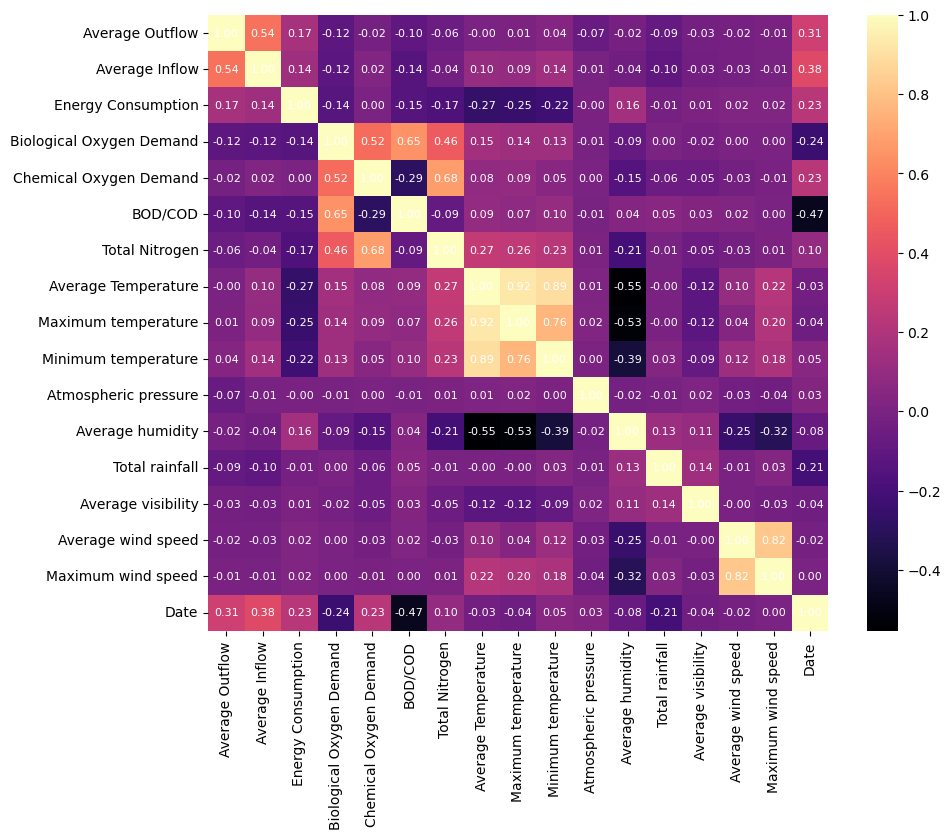

In [51]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap="magma", cbar=True)

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f"{corr_matrix.iloc[i, j]:.2f}",
                 ha="center", va="center", color="white", fontsize=8)
plt.show()

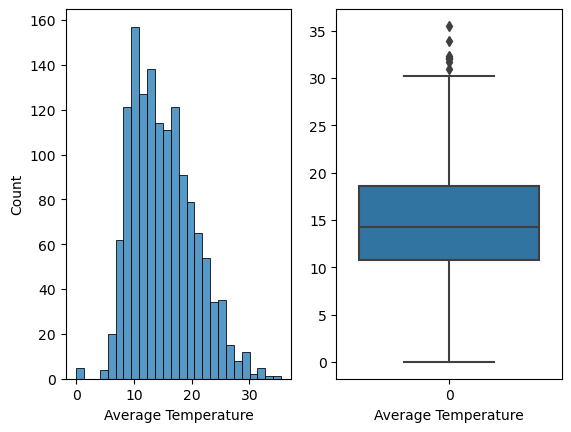

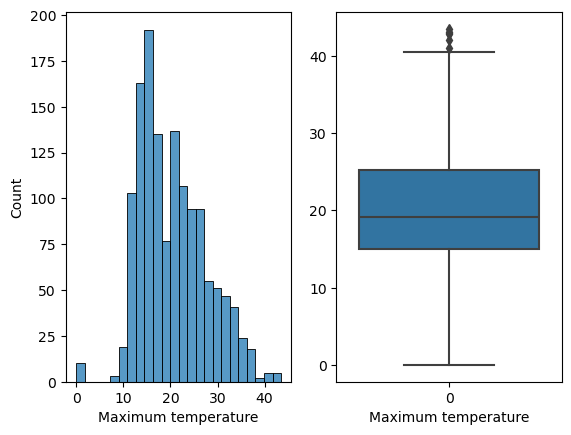

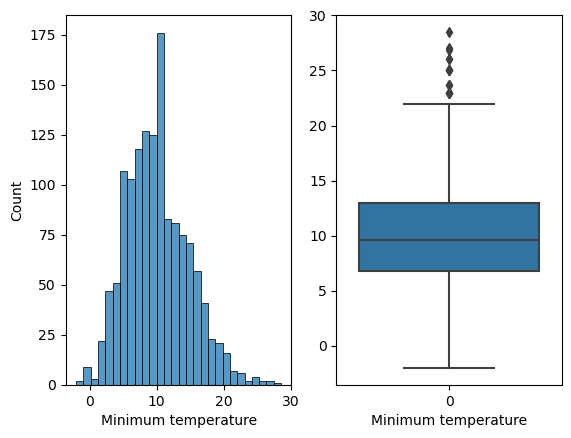

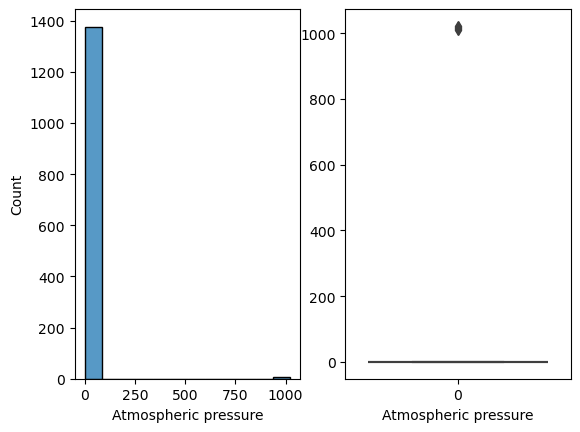

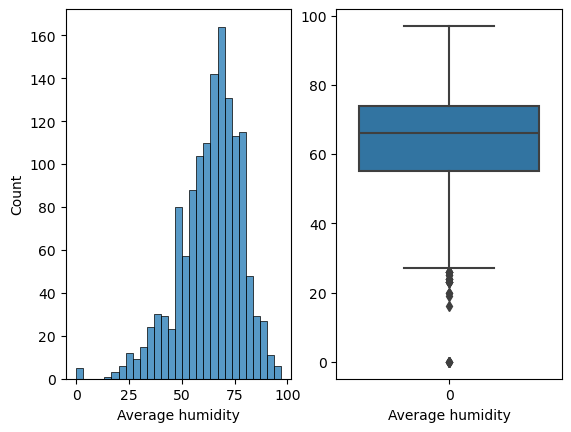

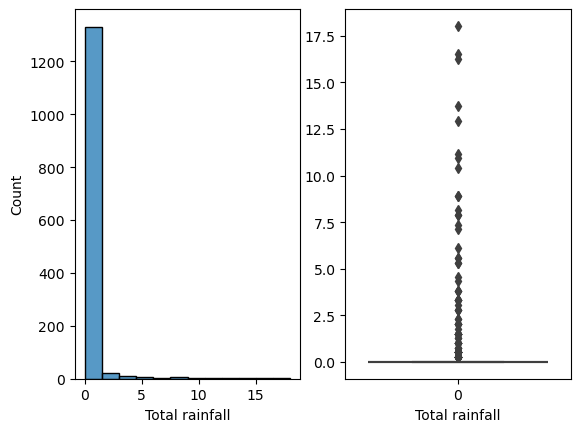

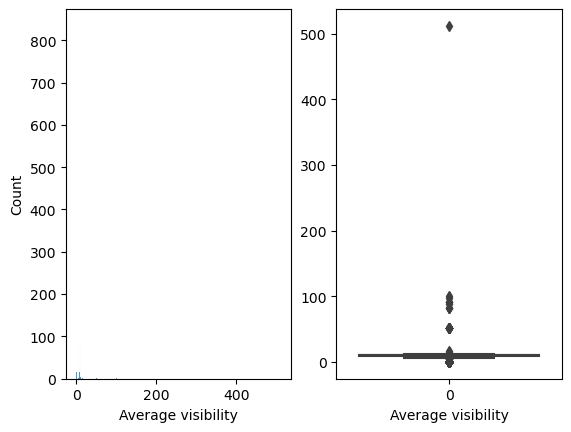

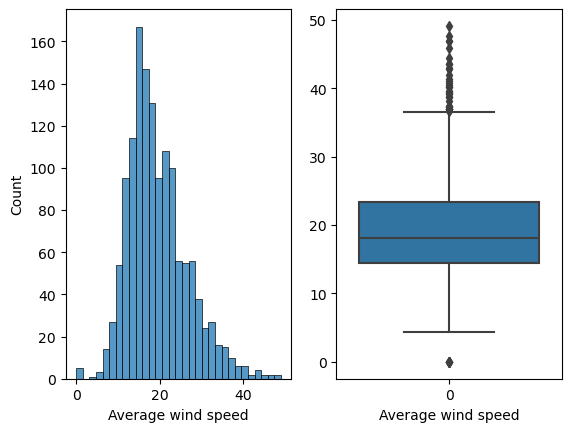

In [52]:
conditions = df.iloc[:, 7:-2]
for j in conditions:
    plt.subplot(1,2,1)
    sns.histplot(df[j])
    plt.subplot(1,2,2)
    plt.xlabel(j)
    sns.boxplot(df[j])
    plt.show()

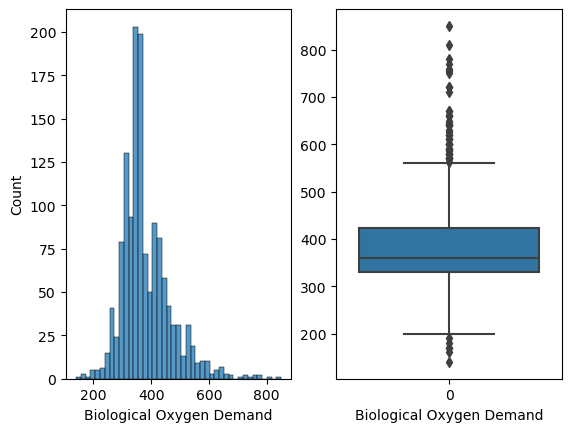

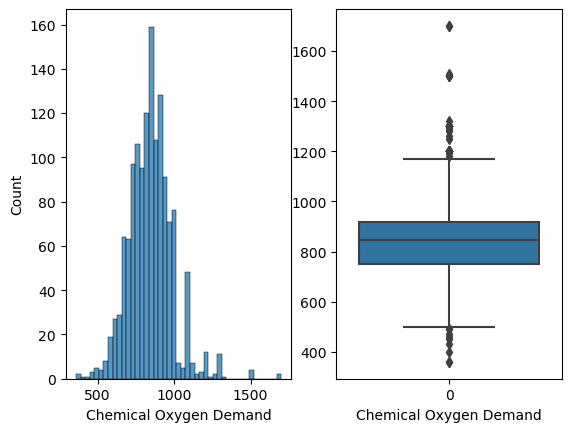

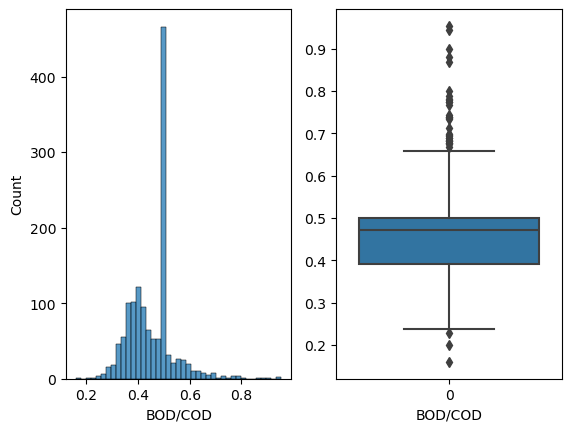

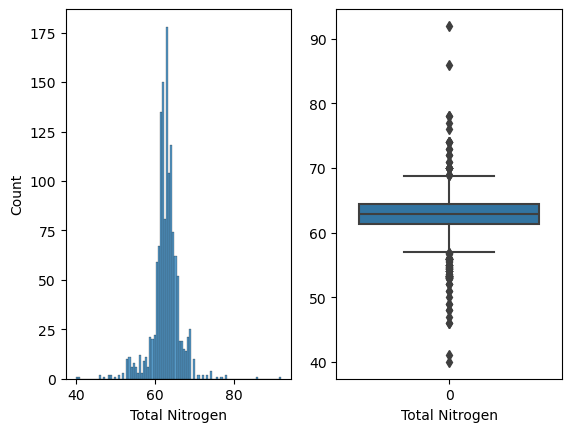

In [53]:
parameters = df.iloc[:, 3:7]
for j in parameters:
    plt.subplot(1,2,1)
    sns.histplot(df[j])
    plt.subplot(1,2,2)
    plt.xlabel(j)
    sns.boxplot(df[j])
    plt.show()

In [54]:
df['Atmospheric pressure'].value_counts()

Atmospheric pressure
0.0       1377
1015.7       1
1013.2       1
1010.5       1
1022.0       1
1017.5       1
Name: count, dtype: int64